**Fully cleaning the dataset**

**Importing data**


In [1]:
# imports
from IPython.display import clear_output
from PIL import Image
import os
import json
# clear
clear_output(wait=True)
# installing kaggle
!pip install -q kaggle
# user and key info
info = {"username":"jackbellamy","key":"3442898ba5e904ac3a48eb5b59398805"}
# opening file
json_object = json.dumps(info, indent=4)
with open("kaggle.json", "w") as outfile:
    outfile.write(json_object)
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# copying data to content file of kaggle which can be found on the left hand side of the screen
if not (os.path.exists("nfl-big-data-bowl-2022")):
  !kaggle competitions download -c nfl-big-data-bowl-2022
  !mkdir nfl-big-data-bowl-2022
  !unzip nfl-big-data-bowl-2022.zip -d nfl-big-data-bowl-2022

mkdir: /Users/emiljino/.kaggle: File exists


**Serialisation**

In [2]:
import pandas as pd
# reading the data to variables
scouting = pd.read_csv("nfl-big-data-bowl-2022/PFFScoutingData.csv")
games = pd.read_csv("nfl-big-data-bowl-2022/games.csv")
players = pd.read_csv("nfl-big-data-bowl-2022/players.csv")
plays = pd.read_csv("nfl-big-data-bowl-2022/plays.csv")
tracking2018 = pd.read_csv("nfl-big-data-bowl-2022/tracking2018.csv")
tracking2019 = pd.read_csv("nfl-big-data-bowl-2022/tracking2019.csv")
tracking2020 = pd.read_csv("nfl-big-data-bowl-2022/tracking2020.csv")

**Generalised cleaning functions**

**Abbreviations to full names**

In [3]:
def abbrvs(csv,column,abbrv,fullname):
  # new names
  type_name = []
  # looping through
  for i in csv[column]:
    # filtering out NaN values
    if i in abbrv:
      index = abbrv.index(i)
      type_name.append(fullname[index])
    else:
      type_name.append(i)
  return type_name

**Team and number splitting**

In [4]:
def team_number_splitting(csv,column,symbol):
  # splitting to team and number
  split_team = []
  split_numbers = []
  # splitting the data
  split = csv[column].str.split(symbol, expand = True)
  # loop for each
  for i in range(0,len(csv)):
    # specific data
    split.iloc[i]
    # number of NaN
    nan_num = split.iloc[i].isna().sum()
    max = len(split.iloc[i])
    if max-nan_num == 0:
      split_team.append(csv[column][i])
      split_numbers.append(csv[column][i])
    else:
      info = []
      for j in range(0,(max-nan_num)):
        split_i = split[j][i].split(" ")
        info.append(split_i)
      # team name
      split_team.append(info[0][0])
      # numbers
      nums = []
      for k in range(0,max-nan_num):
        num = info[k][1]
        nums.append(num)
      split_numbers.append(nums)
  return split_team,split_numbers

**Number splitting**

In [5]:
def number_splitting(csv,column,symbol,n):
  split = csv[column].str.split(symbol, n = n, expand = True)
  return split

**Pandas to number**

In [6]:

def pd_to_num(csv,split,column_names):
  split.columns = column_names
  # adding columns
  for name in column_names:
    csv[name] = pd.to_numeric(split[name])
  return

**Scouting** 


In [7]:
# before
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF


In [8]:
# abbreviations: 'kickType', 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectIntended', 'returnDirectionActual', 'KickTypeContact'
# team number splitting: 'missedTackler', 'specialTeamsSafeties', 'Vises'
# number splitting: 'kickoffReturnFormation'

In [9]:
# abbreviations
# 'kickType'
csv = scouting
column = "kickType"
kick_types = ['D','F','K','O','P','Q','S','B','N','R','A']
kick_type_names = ['Deep','Flat','Free','Obvious','Pooch','Squib','Surprise','Deep','Normal','Rugby','Aussie']
# calling function
kick_type_fullnames = abbrvs(csv,column,kick_types,kick_type_names)
# adding column
scouting["kick_type_name"] = kick_type_fullnames

# 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectIntended', 'returnDirectionActual', 'KickTypeContact'

In [10]:
# team and numbers
# 'missedTackler'
csv = scouting

column = "missedTackler"
symbol = "; "
# calling function
missed_tackler_team, missed_tackler_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["missed_tackler_team"] = missed_tackler_team
scouting["missed_tackler_numbers"] = missed_tackler_numbers

# 'specialTeamsSafeties'
column = "specialTeamsSafeties"
symbol = "; "
# calling function
specialTeamsSafeties_team, specialTeamsSafeties_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["special_teams_safeties_team"] = specialTeamsSafeties_team
scouting["special_teams_safeties_numbers"] = specialTeamsSafeties_numbers

# 'Vises'
column = "vises"
symbol = "; "
# calling function
vises_team, vises_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["vises_team"] = vises_team
scouting["vises_numbers"] = vises_numbers

In [11]:
# number splitting
# 'kickoffReturnFormation'
csv = scouting
column = "kickoffReturnFormation"
symbol = "-"
n = 2
column_names = ['formation_front','formation_mid','formation_back']
# calling function
formation_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,formation_split,column_names)

In [12]:
# after
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,...,kick_type_name,missed_tackler_team,missed_tackler_numbers,special_teams_safeties_team,special_teams_safeties_numbers,vises_team,vises_numbers,formation_front,formation_mid,formation_back
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,...,Deep,NaN,NaN,PHI,"[23, 27]",NaN,NaN,8.0,0.0,2.0
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,...,Normal,PHI,[57],NaN,NaN,ATL,"[83, 27, 34, 21]",NaN,NaN,NaN
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,PHI,[58],NaN,NaN,NaN,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,...,Deep,ATL,[83],ATL,"[17, 22]",NaN,NaN,8.0,0.0,2.0
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,...,Normal,NaN,NaN,ATL,[37],ATL,"[83, 34, 21]",NaN,NaN,NaN


**Games**

In [13]:
# before
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN


In [14]:
# abbreviations: 'homeTeamAbbr' , 'visitorTeamAbbr'
# team number splitting:
# number splitting: 'gameDate', 'gameTimeEastern'

In [15]:
# abbreviations
# 'homeTeamAbbr', 'visitorTeamAbbr'

In [16]:
# number splitting
# 'gameDate'
csv = games

column = "gameDate"
symbol = "/"
n = 2
column_names = ['game_date_day','game_date_month','game_date_year']
# calling function
game_date_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_date_split,column_names)

# 'gameTimeEastern'
column = "gameTimeEastern"
symbol = ":"
n = 2
column_names = ['game_time_hour','game_time_minute','game_time_second']
# calling function
game_time_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_time_split,column_names)

In [17]:
# after
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,game_date_day,game_date_month,game_date_year,game_time_hour,game_time_minute,game_time_second
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL,9,6,2018,20,20,0
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF,9,9,2018,13,0,0
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT,9,9,2018,13,0,0
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN,9,9,2018,13,0,0
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN,9,9,2018,13,0,0


**Players**

In [18]:
# before
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [19]:
# abbreviations:
# team number splitting:
# number splitting: birth
# unique one is height

In [20]:
# 'birthDate'
# splitting the numbers
players['birth_year'] = pd.DatetimeIndex(players['birthDate']).year

In [21]:
# 'height'
height_split = players["height"].str.split("-", n = 1, expand = True)
# new column names
height_split.columns = ['Feet', 'Inch']
# adding new columns
players["height_feet"] = pd.to_numeric(height_split["Feet"])
players["height_inch"] = pd.to_numeric(height_split["Inch"])
# still have 73 feet
# getting rid of NaN values
players["height_inch"] = players["height_inch"].fillna(0)
# replacing heights that did not have '-' at start
for i in players["height_feet"]:
    if i > 7:
        j = 0.0833333 * i
        players["height_feet"].replace({i : j}, inplace=True)        
# inches to numerical value
players["height_inch"] = 0.0833333 * players["height_inch"]
# adding feet and inches to get one value
height_numerical = players["height_feet"] + players["height_inch"]
# adding new numerical value column
players["height_numerical"] = pd.to_numeric(height_numerical)

In [22]:
# after
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName,birth_year,height_feet,height_inch,height_numerical
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,1992.0,6.0,0.083333,6.083333
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,1994.0,6.0,0.000000,6.000000
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,1993.0,6.0,0.000000,6.000000
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,1992.0,6.0,0.083333,6.083333
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,1993.0,6.0,0.083333,6.083333


**Plays**

In [23]:
# before
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [24]:
# abbreviations: 'possessionTeam'
# team number splitting: 'penaltyJerseyNumbers'
# number splitting: 'gameClock'

In [25]:
# abbreviations
# 'possessionTeam'

In [26]:
# number splitting
# 'gameClock'
csv = plays

column = "gameClock"
symbol = ":"
n = 2
column_names = ['game_clock_minute','game_clock_second','game_clock_milli']
# calling function
game_time_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_time_split,column_names)

In [27]:
# after
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,game_clock_minute,game_clock_second,game_clock_milli
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,0,0,NaN,66.0,NaN,40,45,15,0,0
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,0,0,NaN,56.0,5.0,36,18,9,20,0
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,0,0,NaN,21.0,NaN,0,13,5,3,0
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,0,3,NaN,64.0,30.0,34,75,5,1,0
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,0,3,NaN,65.0,NaN,45,45,0,33,0


**Tracking**

In [28]:
# before
tracking2018.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


In [29]:
# it is clean

**Overall, clean now except 'penaltyJerseyNumbers' and some abbrvs**

**Machine learning**

**Random forest**

In [30]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Random Forest Model**

In [31]:
# getting punt data
data = plays.loc[plays['specialTeamsPlayType'] == "Punt"]
# getting variables
data = data[["gameId","playId","kickerId","returnerId","kickReturnYardage","quarter","down","game_clock_minute","yardsToGo","kickLength","playResult"]]
## making/extending variables
# kick type - in scouting
# hang time - in scouting
# punters accuracy - all data here to be applied
scouting_data = scouting[['gameId','playId','kick_type_name','hangTime','kickDirectionIntended','kickDirectionActual']]
# loop for some find of IDs

# returners average
# returner ids
returner_id = data['returnerId']
average_return = []
# create loop to find stuff then mean 
for returner in returner_id:
  yards = data.loc[(data["returnerId"] == returner), "kickReturnYardage"]
  average_return.append(yards.mean())
# adding to data 
data["returner_average"] = average_return
mean_value=data['returner_average'].mean()
data['returner_average'].fillna(value=mean_value, inplace=True)


# number of defenders in back - all data here to be applied
defender_data = scouting[['gameId','playId','formation_front','formation_mid','formation_back']]


# viewing
data.head()

,gameId,playId,kickerId,returnerId,kickReturnYardage,quarter,down,game_clock_minute,yardsToGo,kickLength,playResult,returner_average
1,2018090600,366,45603.0,42450,5.0,1,4,9,4,56.0,36,7.666667
4,2018090600,872,45603.0,NaN,NaN,1,4,0,18,65.0,45,8.556802
5,2018090600,973,37267.0,29957,NaN,2,4,14,19,49.0,49,8.450000
10,2018090600,1850,45603.0,NaN,NaN,2,4,1,8,58.0,58,8.556802
11,2018090600,1989,37267.0,29957,8.0,2,4,0,8,57.0,61,8.450000


In [32]:
# practice area


In [33]:
# sorting out NA values

# vieiwng
data.head()

,gameId,playId,kickerId,returnerId,kickReturnYardage,quarter,down,game_clock_minute,yardsToGo,kickLength,playResult,returner_average
1,2018090600,366,45603.0,42450,5.0,1,4,9,4,56.0,36,7.666667
4,2018090600,872,45603.0,NaN,NaN,1,4,0,18,65.0,45,8.556802
5,2018090600,973,37267.0,29957,NaN,2,4,14,19,49.0,49,8.450000
10,2018090600,1850,45603.0,NaN,NaN,2,4,1,8,58.0,58,8.556802
11,2018090600,1989,37267.0,29957,8.0,2,4,0,8,57.0,61,8.450000


In [50]:
# final data
final_data = data[["game_clock_minute","yardsToGo","kickLength","returner_average","playResult"]]  
final_dataSVR = data[["game_clock_minute","yardsToGo","kickLength","returner_average","playResult","kickReturnYardage"]]
final_data = final_data.dropna(axis="rows",how="any")
final_data.head()

,game_clock_minute,yardsToGo,kickLength,returner_average,playResult
1,9,4,56.0,7.666667,36
4,0,18,65.0,8.556802,45
5,14,19,49.0,8.450000,49
10,1,8,58.0,8.556802,58
11,0,8,57.0,8.450000,61


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px

# features and labels
features = final_data[["game_clock_minute","yardsToGo","kickLength","returner_average"]]           #.drop(columns = ["gameId","playId","playDescription","playResult"])
labels = final_data["playResult"]
# splitting
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state = 42)
# model
model = RandomForestClassifier(criterion = "gini",
                               max_depth = 8,
                               min_samples_split = 10,
                               random_state = 42,
                               )
# fitting
model.fit(X_train, Y_train)
# importance
info = model.feature_importances_
# printing
print("feature importance \n---------------------------------")
for i in range(len(features.columns)):
  print(features.columns[i] , ": " , round(info[i],3))
print("---------------------------------")
# predicting
Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test,Y_pred)
print("accuracy: ",round(acc,3))
# accuracy in interval
interval = 0.1 # 10%
counter = 0
Y_test = pd.Series(Y_test).values
for i in range(len(Y_test)):
  if Y_pred[i] <= Y_test[i]*(1+interval) and Y_test[i]*(1-interval) <= Y_pred[i]:
    counter += 1
interval_acc = counter/len(Y_test)
print("accuracy within ", interval*100,"%: ", round(interval_acc,3))

feature importance 
---------------------------------
game_clock_minute :  0.063
yardsToGo :  0.074
kickLength :  0.767
returner_average :  0.096
---------------------------------
accuracy:  0.39
accuracy within  10.0 %:  0.585


In [36]:
import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

# plotting
fig = px.scatter(x = Y_test, 
                 y= Y_pred,
                 trendline = "ols",
                 trendline_color_override="red",
                 #name = "trendline",
                 labels=dict(x="Actual play result", y="Predicted play result"),
                 width=500, 
                 height=500
                )

x = np.linspace(-40,80)

fig.add_trace(go.Scatter(
    x=x,
    y=x,
    name="y = x",
))

# fig.update_layout(xaxis_range=[min(Y_test),max(Y_test)],
#                   yaxis_range=[min(Y_pred),max(Y_pred)]
# )

fig.update_layout(xaxis_range=[min(Y_test),max(Y_test)],
                  yaxis_range=[min(Y_test),max(Y_test)]
)

model = px.get_trendline_results(fig)
alpha = model.iloc[0]["px_fit_results"].params[0]
beta = model.iloc[0]["px_fit_results"].params[1]

fig.data[0].name = 'observations'
fig.data[0].showlegend = True
fig.data[1].name = fig.data[1].name  + 'y = ' + str(round(alpha, 2)) + ' + ' + str(round(beta, 2)) + 'x'
fig.data[1].showlegend = True

fig.update_layout(legend=dict(yanchor="bottom", y=0.02, xanchor="right", x=0.98))

fig.show()

In [57]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# define the independent variables and dependent variable
X = final_dataSVR[["game_clock_minute","yardsToGo","kickLength","returner_average", "kickReturnYardage"]]
X.fillna(0, inplace=True)
y = final_dataSVR['playResult']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# perform grid search to find the best hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVR(), param_grid, cv=5)
grid.fit(X_train, y_train)

# train the model with the best hyperparameters
svr = grid.best_estimator_
svr.fit(X_train, y_train)



# evaluate the model on the test set
print('Test set R-squared score:', svr.score(X_test, y_test))



/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2515/1643654613.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Test set R-squared score: 0.7695419437291652


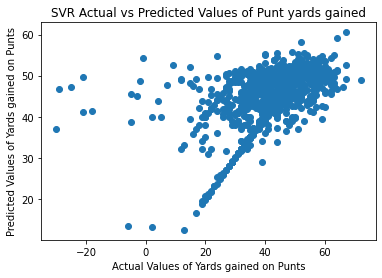

In [48]:
import matplotlib.pyplot as plt

# make predictions using the SVR model
predictions = svr.predict(X_test)

# plot actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values of Yards gained on Punts")
plt.ylabel("Predicted Values of Yards gained on Punts")
plt.title("SVR Actual vs Predicted Values of Punt yards gained")
plt.show()

MSE: 38.53543804325552


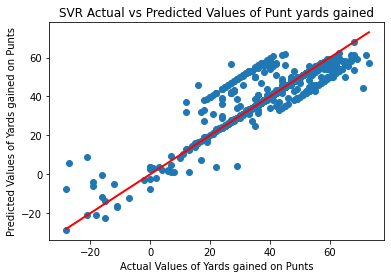

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# make predictions using the SVR model
predictions = svr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print("MSE:", mse)

# plot actual vs predicted values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2) # add red line
plt.plot([predictions.min()], [predictions.max()], 'g-', lw=2) # add red line
plt.xlabel("Actual Values of Yards gained on Punts")
plt.ylabel("Predicted Values of Yards gained on Punts")
plt.title("SVR Actual vs Predicted Values of Punt yards gained")
plt.show()